In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product 
from sklearn.cluster import KMeans
import os
import sudoku as sudo

%matplotlib qt

In [49]:
n = 81
time = 50000
space = np.zeros((n,int(time)))

def U(x,gamma,I):
    tif = -1/gamma*np.log(1-(gamma/I))
    return I/gamma*(1-np.exp(-tif*x))

def U_inv(x,gamma,I):
    tif = -1/gamma*np.log(1-(gamma/I))
    return -1/tif*np.log(1-(gamma/I)*x)

def H(x,strength,gamma=1,I=1.01):
    temp = np.clip(U(x,gamma=gamma,I=I)+strength,0,None)
    fire = temp>=1
    temp = (temp<1)*temp
    return U_inv(temp,gamma=gamma,I=I),fire

inh = np.load("sudoku.npy")
exi = 1-inh

exi[10,25] = 1
exi[25,10] = 1
np.fill_diagonal(exi,0.0)
np.fill_diagonal(inh,0.0)

#state = np.random.normal(size=n)%1

for i in range(int(time)):
    
    if i == 1000:
        state = state + np.random.normal(loc=0.0,scale=0.05,size=81)
    
    fire_time = np.min(1-state)   
    
    state = state + fire_time
    
    new_state = state + 1e-6
    
    fire = new_state>=1
    
    while np.sum(fire)>0:

        new_state[fire] = 0.0
        
        coupling_exi = 0.00035*np.power(np.matmul(exi,fire),0.2)
        coupling_inh = 0.0006*np.matmul(inh,fire)
        
        total = coupling_exi-coupling_inh
        #print(total)
        
        state = new_state + 1e-6
        update = H(state,total)
        new_state,fire = np.clip(update[0],a_min=0,a_max=None),update[1]
        
    state = new_state
    space[:,i] = state
    if i%1000 == 0:
        print('Progress',round(i/int(time)*100,1),"%",end="\r")

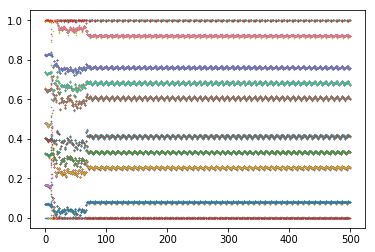

In [50]:
rs =100
phase = space[:,::rs]-space[0,::rs]
phase[phase<0] = 1+phase[phase<0]

plt.figure()
cm = plt.cm.hsv(np.linspace(0.5,1,9))
for i in range(81):
    plt.plot(phase[i,:],'.',markersize=1)
plt.show()

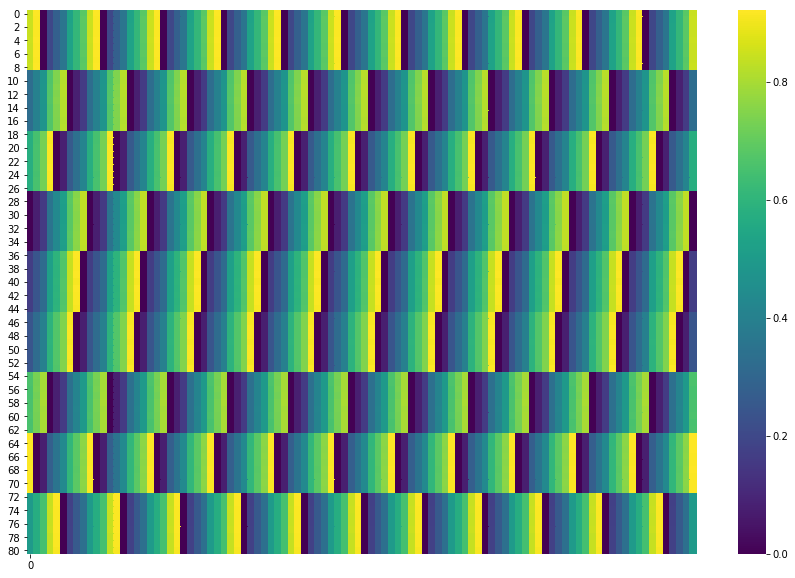

In [51]:
df = pd.DataFrame(space[:,-1:])
model = KMeans(n_clusters=9)
pred = model.fit_predict(df)
order = np.argsort(pred)
# order = np.argsort(space[:,-1])
fig = plt.figure(figsize=(15,10))
g = sns.heatmap(space[order,-100:],yticklabels=2,xticklabels=100,cmap='viridis')
#g = sns.heatmap(space[:,-100:],yticklabels=2,xticklabels=100,cmap='viridis')
g.set_yticklabels(fig.axes[0].get_yticklabels(),rotation=0)
print()

In [52]:
pred[10]==pred[25]

False

In [53]:
for i in range(9):
    temp = np.arange(0,81,1,dtype=np.int32)[pred==i]
    sum_ = 0
    for j,k in product(temp,temp):
        sum_ += inh[j,k]
    print(sum_,end=" ")

0 0 0 0 0 0 0 0 0 

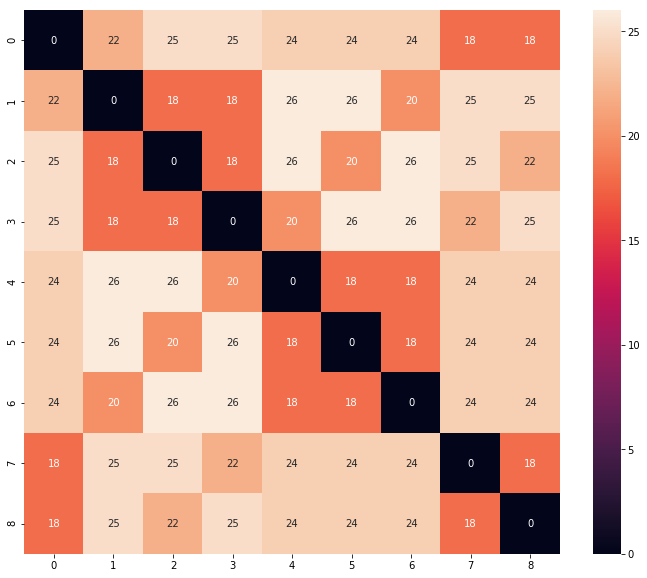

In [54]:
inh_out = np.zeros((9,9))
order = np.argsort(space[:,-1])

for i in range(9):
    for j in range(9):
        temp_i = order[9*i:9*i+9] # np.arange(0,81,1,dtype=np.int32)[pred==i]
        temp_j = order[9*j:9*j+9] # np.arange(0,81,1,dtype=np.int32)[pred==j]
        sum_ = 0
        for k,l in product(temp_i,temp_j):
            sum_ += inh[k,l]
        inh_out[i,j]=sum_
        
#order_phase =
plt.figure(figsize=(12,10))
#submat = np.concatenate([inh_out,inh_out])
# sns.heatmap(np.concatenate([submat,submat],axis=1),annot=True)
sns.heatmap(inh_out,annot=True)

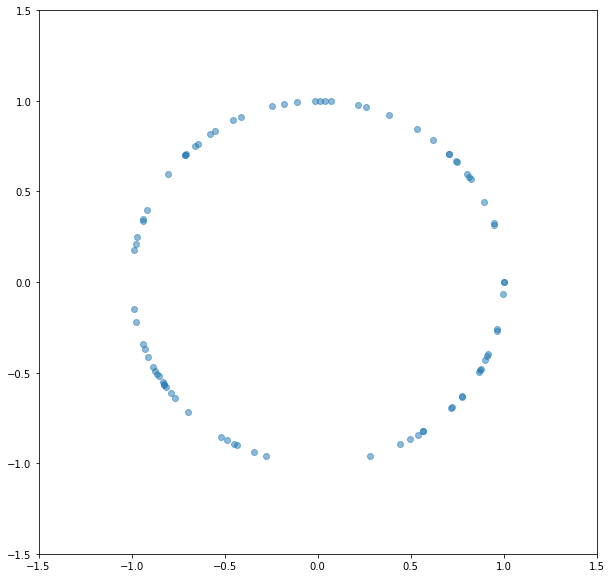

In [6]:
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10,10))
ax.set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

def phasetopos(phi):
    return np.cos(2*np.pi*phi), np.sin(2*np.pi*phi)

temp = phasetopos(space[:,0])
data = ax.plot(temp[0],temp[1],'o',alpha=0.5)[0]

def animate(i):
    temp = phasetopos(space[:,i])
    data.set_xdata(temp[0])
    data.set_ydata(temp[1])

anim = FuncAnimation(
    fig, animate, interval=10, frames=time-1,repeat=False)
 
plt.draw()
plt.show()

In [7]:
x = np.linspace(0,1,100)
#plt.plot(x,U(x,1,1.008))
#plt.plot(x,U_inv(x,1,1.008))
for i in range(-5,5):
    plt.plot(x,H(x,np.ones(x.shape)*i*0.01,1,1.008)[0])
plt.plot(x,x)

plt.show()

In [137]:

H(np.array([0,0.5]),[0.001,0.001],1,1.008)

(array([2.05231195e-04, 5.02315488e-01]), array([False, False]))

In [12]:
np.save("spacelol",space)